In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from image_based_localization.main import ImageBasedLocalization, add_argument
import os
from collections import namedtuple

In [64]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
args = namedtuple('Args', ['model_name'])
ibl = ImageBasedLocalization(args('chess'))
trajectory = ibl.run_localization()
ibl.cleanup()

0 dist diff: 0.24478656824638975 angle diff: 19.549211615128222
1 dist diff: 0.3034052080693126 angle diff: 24.05118181131716
2 dist diff: 0.22611733454363905 angle diff: 17.777323147130847
3 dist diff: 0.24938129020676914 angle diff: 3.0456119741811514
4 dist diff: 0.31881528171046547 angle diff: 13.968171894932576
5 dist diff: 0.3113214200929696 angle diff: 18.490401537793407
6 dist diff: 0.3754365223653574 angle diff: 15.254591239465313
7 dist diff: 0.43369566051588604 angle diff: 6.0716799341758385
8 dist diff: 0.2547866659919145 angle diff: 5.514821969724772
9 dist diff: 0.26288168430865605 angle diff: 8.31477679077596
10 dist diff: 0.21000002377493912 angle diff: 3.9634126256308044
11 dist diff: 0.2874406322780622 angle diff: 20.806770904404654
12 dist diff: 0.20754505254310607 angle diff: 11.22158873785231
13 dist diff: 0.29470109896818164 angle diff: 2.414948458577294
14 dist diff: 0.20223236399420313 angle diff: 3.933146385946731
15 dist diff: 0.29234513949665036 angle diff: 1

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from image_based_localization.siamese_network.helper import angleDifference, distDifference

# plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200

def calc_error(self, estimated_pose, gt_pose):
    quat = estimated_pose.rotation().quaternion()
    quat = np.hstack([quat[1:],quat[0]])
    dist_diff = distDifference(estimated_pose.translation(), gt_pose[0:3])
    angle_diff = angleDifference(quat, gt_pose[3:])
    return dist_diff, angle_diff

N = len(trajectory)
trajectory_xy = np.ones([N,6])
diff = np.ones([N,4])
for i, (initial_pose, estimated_pose, gt_pose) in enumerate(trajectory):
    trajectory_xy[i,0:2] = initial_pose.translation()[:2]
    trajectory_xy[i,2:4] = estimated_pose.translation()[:2]
    trajectory_xy[i,4:6] = gt_pose.translation()[:2]
    
    tmp = initial_pose.rotation().quaternion()
    initial_quat = np.hstack([tmp[1:],tmp[0]])
    tmp = estimated_pose.rotation().quaternion()
    estimated_quat = np.hstack([tmp[1:],tmp[0]])
    tmp = gt_pose.rotation().quaternion()
    gt_quat = np.hstack([tmp[1:],tmp[0]])

    diff[i, 0] = angleDifference(initial_quat, gt_quat)
    diff[i, 1] = angleDifference(estimated_quat, gt_quat)
    diff[i, 2] = distDifference(initial_pose.translation(), gt_pose.translation())
    diff[i, 3] = distDifference(estimated_pose.translation(), gt_pose.translation())


Text(0.5, 1.0, 'Rotation error')

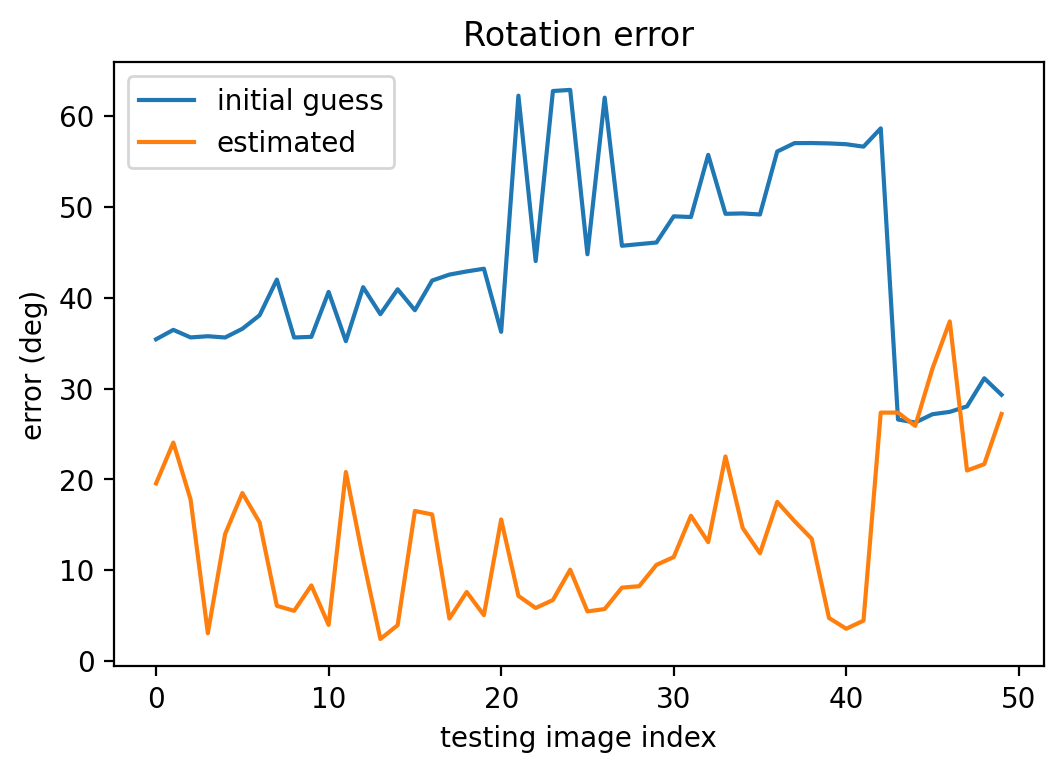

In [83]:
N = 50
plt.plot(np.arange(N), diff[:,0])
plt.plot(np.arange(N), diff[:,1])
plt.legend(['initial guess','estimated'])
plt.xlabel('testing image index')
plt.ylabel('error (deg)')
plt.title('Rotation error')

Text(0.5, 1.0, 'Translation Error')

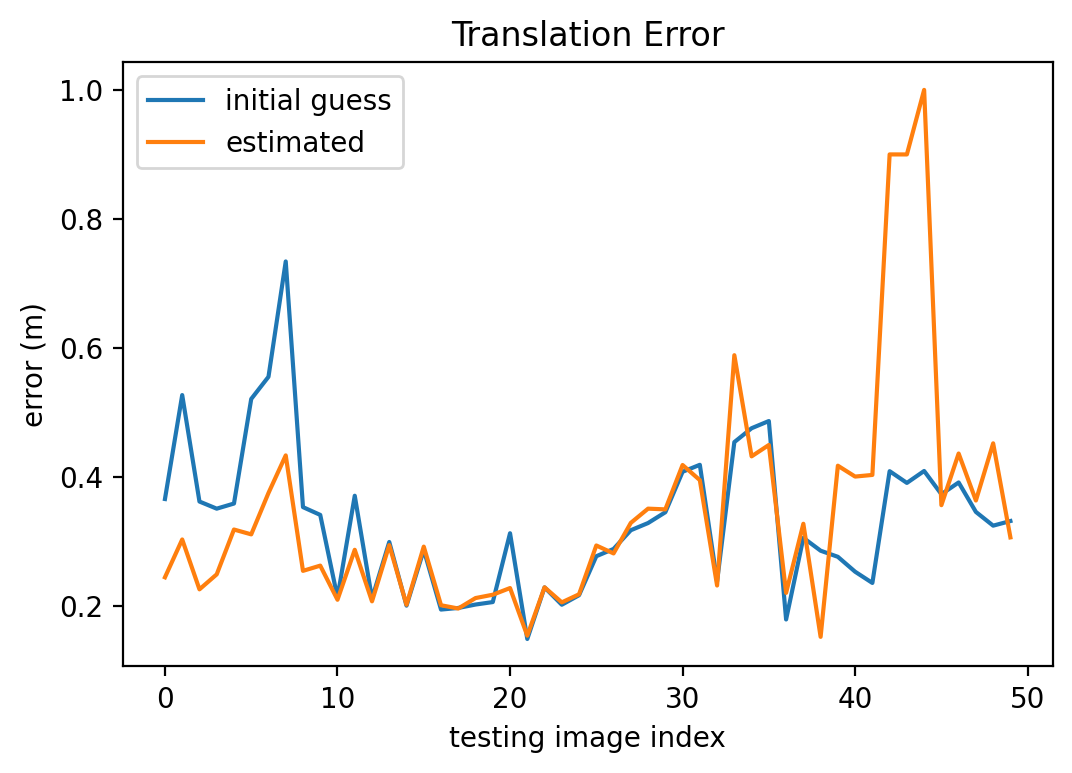

In [82]:
N = 50
plt.plot(np.arange(N), diff[:,2])
plt.plot(np.arange(N), diff[:,3].clip(max=1))
plt.legend(['initial guess','estimated'])
plt.xlabel('testing image index')
plt.ylabel('error (m)')
plt.title('Translation Error')